Q1

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
def rgb_to_grayscale(frog):
   #using formula grayscale image = ((0.3 * R) + (0.59 * G) + (0.11 * B))
   grayscale_image = np.dot(frog, [0.3, 0.59, 0.11])
   return grayscale_image



In [ ]:
# Read the RGB image
frog = cv2.imread("cutefrog.jpg")

In [ ]:
# Convert the RGB image to grayscale
grayscale_image = rgb_to_grayscale(frog)

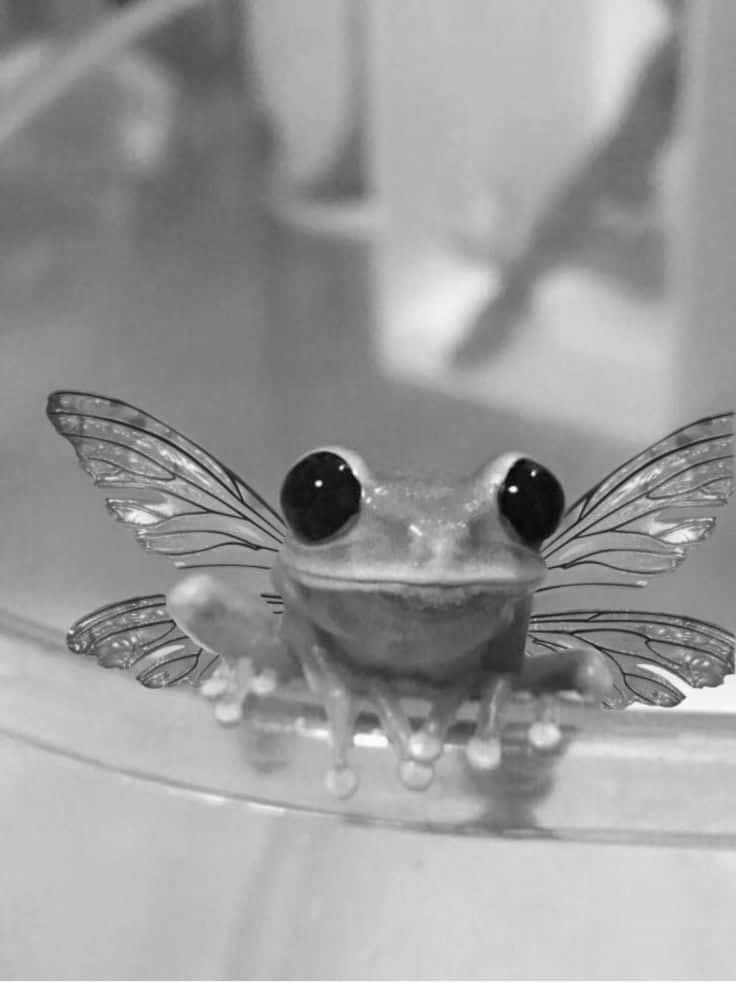

In [ ]:
# Display the grayscale image
cv2_imshow(grayscale_image)

q2

In [ ]:
import json
from PIL import Image
import csv

In [ ]:
# Convert the grayscale image to a list
grayscale_image_list = grayscale_image.tolist()

# Save the grayscale image to a JSON file
with open("grayscale_image.json", "w") as f:
  json.dump(grayscale_image_list, f)

Q3

<ipython-input-43-0e08706458a1>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(image_size, Image.ANTIALIAS)


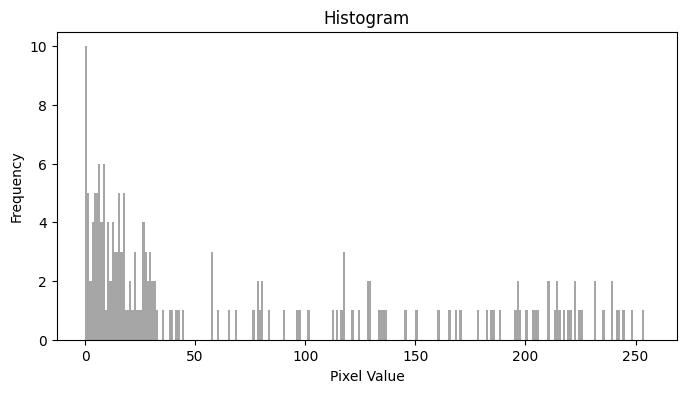

In [ ]:
def make_histogram(image_path, image_size):
    img = Image.open(image_path)
    img = img.resize(image_size, Image.ANTIALIAS)
    img_gray = img.convert('L')
    histogram = img_gray.histogram()

    # histogram
    plt.figure(figsize=(8, 4))
    plt.title("Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.hist(histogram, bins=256, range=(0, 256), color='gray', alpha=0.7)
    plt.show()

image_path = "/content/cutefrog.jpg"
image_size = (200, 200)

make_histogram(image_path, image_size)

q4

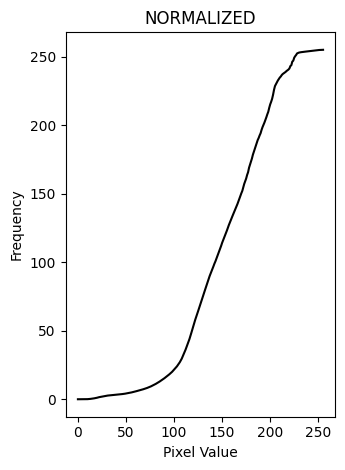

In [ ]:
def make_histogram(image):
    plt.figure(figsize=(8, 6))
    plt.hist(image.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of the Image')
    plt.grid(True)
    plt.show()

grayscalee = "/content/cutefrog.jpg"
grayimage = np.array(Image.open(grayscalee))

histogram, _ = np.histogram(grayimage.flatten(), bins=256, range=[0, 256])
cumulative_sum = np.cumsum(histogram)
equalized_histogram = ((cumulative_sum - np.min(cumulative_sum)) * 255) / (np.max(cumulative_sum) - np.min(cumulative_sum))
equalized_image = equalized_histogram[grayimage]

plt.subplot(1, 2, 2)
plt.plot(equalized_histogram, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('NORMALIZED')

plt.tight_layout()
plt.show()

Q5

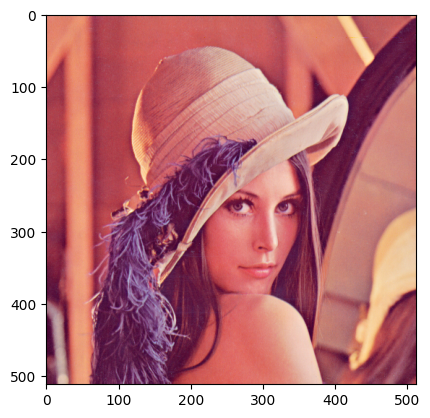

In [ ]:
c = cv2.imread("/content/Lenna.png")[:, :, ::-1]
center = (100, 100)
M = cv2.getRotationMatrix2D(center, 0, 0.3)
resized_c = cv2.warpAffine(c, M, (c.shape[1], c.shape[0]))
plt.imshow(c)

In [ ]:
from skimage import io, color
from skimage.transform import resize
from scipy.signal import convolve2d

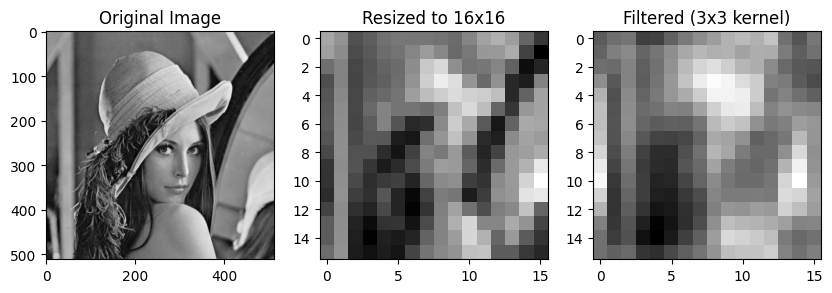

In [ ]:
image_path = "/content/Lenna.png"
image = io.imread(image_path)

gray_image = color.rgb2gray(image)
resized_image = resize(gray_image, (16, 16))

kernel = np.array([[3,0,3], [1,0,1], [3,0,3]])
filtered_image = convolve2d(resized_image, kernel, mode='same', boundary='wrap')

plt.figure(figsize=(10, 5))
for i, (img, title) in enumerate(zip([gray_image, resized_image, filtered_image], ['Original Image', 'Resized to 16x16', 'Filtered (3x3 kernel)'])):
    plt.subplot(131 + i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
plt.show()